# Reconnaissance des Emotions - 1/2

## - Exploration des données et création des Datasets, 

## - Entraînement du modèle d'identification des émotions

<hr>

- <a href='#1'>Prévisualisation des données</a>
- <a href='#2'>Création des datasets d'apprentissage et de test</a>
- <a href='#3'>Préparation des données</a>
- <a href='#4'>Entrainement du modèle de reconnaissance des émotions</a>
- <a href='#5'>Résultats</a> 

<hr>

In [1]:
import os
import sys
import numpy as np
import time
import cv2
import pickle

from glob import glob

from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from keras.layers import Conv2D, experimental, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

### <a id='1'>Prévisualisation des données</a>

In [2]:
tmp = os.listdir("./images/data/train")

LABELS ={}
for clas, feeling in enumerate(tmp):
    LABELS[clas]=feeling

NUM_CLASS = len(tmp)

print("il y a", NUM_CLASS, "classes :")
print(LABELS)

il y a 7 classes :
{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [3]:
trainset = []
for i in tmp:
    chemin = "./images/data/train/"+i
    img = glob("%s/*.jpg" %chemin)
    img = [os.path.abspath(x) for x in img]
    trainset.append(img)

testset = []
for i in tmp:
    chemin = "./images/data/test/"+i
    img = glob("%s/*.jpg" %chemin)
    img = [os.path.abspath(x) for x in img]
    testset.append(img)

print("Nombre d'images de chaque classe dans le train set :")
print([(LABELS[i], len(trainset[i])) for i in range(len(trainset))])
print("Et dans le test set :")
print([(LABELS[i], len(testset[i])) for i in range(len(testset))])

Nombre d'images de chaque classe dans le train set :
[('angry', 3995), ('disgust', 436), ('fear', 4097), ('happy', 7215), ('neutral', 4965), ('sad', 4830), ('surprise', 3171)]
Et dans le test set :
[('angry', 958), ('disgust', 111), ('fear', 1024), ('happy', 1774), ('neutral', 1233), ('sad', 1247), ('surprise', 831)]


### <a id='2'>Création des datasets d'apprentissage et de test</a>

Les fichiers pickles de X_train, Y_train, X_test et Y_test étant fournis pour l'entrainement du modèle, il est inutile de relancer les cellules de cette partie.

In [4]:
paths=[]
y_train=[]

for i in range(len(trainset)):
    for j in range(len(trainset[i])):
        paths.append(trainset[i][j])
        y_train.append(i)

In [ ]:
X_train=[]
for p in paths:
    X_train.append(cv2.imread(p, 0))

In [5]:
paths2=[]
y_test=[]

for i in range(len(testset)):
    for j in range(len(testset[i])):
        paths2.append(testset[i][j])
        y_test.append(i)

In [ ]:
X_test=[]
for p in paths2:
    X_test.append(cv2.imread(p, 0))

### <a id='3'>Préparation des données</a>

###### Chargement des données

In [6]:
# dé-commenter éventuellement pour charger listes créées précédemment.
# sinon, les fichiers contenant les features et targets nécessaires à l'entrainement 
# du CNN sont fournis à la prochaine étape.

#with open('xtrain.pickle', 'rb') as f:
#    X_train = pickle.load(f)
#with open('xtest.pickle', 'rb') as f:
#    X_test = pickle.load(f)

(48, 48)
28709


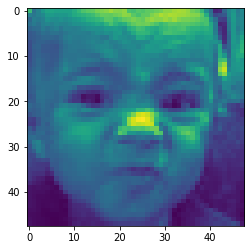

In [7]:
# test
plt.imshow(X_train[12])
print(X_train[12].shape) 
print(len(X_train))
# les images du dataset d'entrée sont toutes des images BW 
# de 48 x 48 pixels. On avait 28709 images dans ce dataset.

###### Mélange des données

In [8]:
# pour l'entraînement
index = np.random.permutation([i for i in range(len(y_train))])

X_train = np.asarray(X_train)[index]
y_train = np.asarray(y_train)[index]
print(X_train.shape)
print(y_train.shape)

(28709, 48, 48)
(28709,)


In [9]:
# pour les tests
index2 = np.random.permutation([i for i in range(len(y_test))])

X_test = np.asarray(X_test)[index2]
y_test = np.asarray(y_test)[index2]
print(X_test.shape)
print(y_test.shape)

(7178, 48, 48)
(7178,)


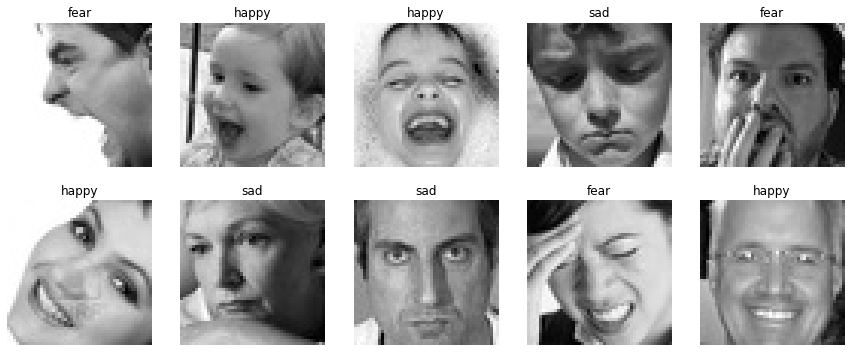

In [10]:
# visualisation
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow( np.uint8(X_train[i]), cmap='gray')
    plt.title(LABELS[y_train[i]])
    plt.axis('off')
plt.show()

###### Prétraitement en vue de l'entrainement avec un CNN Séquentiel 

In [11]:
# standardisation, redimentionnement des features
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255
X_train = X_train.reshape(len(X_train),48,48,1)
X_test = X_test.reshape(len(X_test),48,48,1)

In [12]:
# catégorisation des target
y_test.reshape(len(y_test),1)
y_train.reshape(len(y_train),1)
Y_train = to_categorical(y_train, num_classes=NUM_CLASS).astype(int)
Y_test = to_categorical(y_test, num_classes=NUM_CLASS).astype(int)

In [13]:
# vérification
print(Y_train[12], y_train[12], LABELS[y_train[12]]) #test

[0 0 0 0 0 1 0] 5 sad


In [17]:
# vérification
print(Y_test[4], y_test[4], LABELS[y_train[4]]) #test

[0 0 0 0 0 0 1] 6 fear


```python
# enregistrement des features et targets dans des fichiers pickle
with open('X_train.pickle', 'wb') as f:
    pickle.dump(X_train, f)
with open('X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f)
with open('Y_train.pickle', 'wb') as f:
    pickle.dump(Y_train, f)
with open('Y_test.pickle', 'wb') as f:
    pickle.dump(Y_test, f)
with open('y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)
```

### <a id='4'>Entrainement du modèle de reconnaissance des émotions</a>

###### Chargement des données 

In [20]:
# l'exécution de cette cellule permet de charger les données créées à l'étape suivante.

with open('X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)
with open('X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)
with open('Y_train.pickle', 'rb') as f:
    Y_train = pickle.load(f)
with open('Y_test.pickle', 'rb') as f:
    Y_test = pickle.load(f)
with open('y_test.pickle', 'rb') as f:
    Y_test = pickle.load(f)

###### Création du modèle séquentiel

Différents modèles on été réalisés pour tenter d'obtenir un score acceptable. 
Ces modèles on été entraînés sur Google Colab avec un grand nombre d'epochs pour obtenir rapidement un résultat stable et pourvoir réaliser des modifications. Après de moltiples tentatives, on présente ci-dessous les meilleurs résultats obtenus.

In [11]:
modelX = models.Sequential()

modelX.add(Conv2D(64, 7, padding="same", activation='relu', input_shape=(48,48,1)))
modelX.add(MaxPooling2D(2))
modelX.add(Dropout(0.5))
modelX.add(Conv2D(64, 3, padding="same", activation='relu'))
modelX.add(MaxPooling2D(2))
modelX.add(Dropout(0.5))
modelX.add(Conv2D(128, 3, padding="same", activation='relu'))
modelX.add(MaxPooling2D(2))
modelX.add(Dropout(0.5))
modelX.add(Flatten())
modelX.add(Dense(64, activation="relu"))
modelX.add(Dropout(0.25))
modelX.add(Dense(32, activation="relu"))
modelX.add(Dropout(0.25))
modelX.add(Dense(NUM_CLASS, activation='softmax'))

In [12]:
# premier entraînement avec Adamax, hyper-paramètres par défaut
modelX.compile(optimizer=optimizers.Adamax(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modelX.fit(X_train, Y_train, epochs=100, batch_size=8, validation_split=0.2)

A l'issue de ce premier entrainement, on obtient une accuracy sur les données de validation de 50%. 
On procède à un second entrainement du modèle pour tenter d'améliorer ce score.
Après de nombreuses tentatives, on trouve les hyperparamètres optimaux suivants :
- optimizer : Adamax,
- learning rate : 0.00001,
- beta_1 : 0.97, 
- beta_2 : 0.97, 
- epsilon : 1e-07, 
- loss : categorical_crossentropy
- metrics : accuracy

In [13]:
# second entraînement
modelX.compile(optimizer=optimizers.Adamax(learning_rate=0.00001, 
                                           beta_1=0.97, beta_2=0.97, 
                                           epsilon=1e-07), 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [ ]:
history2 = modelX.fit(X_train, Y_train, epochs=20, batch_size=5, validation_split=0.2)

In [ ]:
 #modelX.save('modelX_76')

###### Validation sur la base de données de test

In [21]:
modelX = models.load_model('modelX_76')

In [22]:
len(X_test)
X_test.shape

(7178, 48, 48, 1)

In [23]:
Y_pred = modelX.predict(X_test)

In [24]:
y_pred=[]
for y in Y_pred:
    y_pred.append(np.argmax(y))

In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)

0 : angry
1 : disgust
2 : fear
3 : happy
4 : neutral
5 : sad
6 : surprise


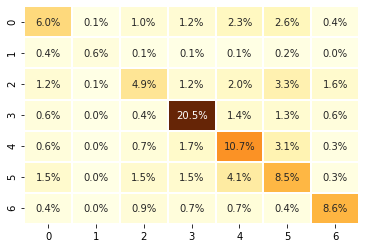

In [59]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), 
            annot=True, fmt='.1%', cmap="YlOrBr", cbar=False, 
            linewidths=1, )
for i in LABELS:
    print (i, ":", LABELS[i])

### <a id='5'>Résultats</a>

Le modèle semble a avoir plus de mal à reconnaître certains sentiments que d'autres. Notamment le dégoût, comme on le voit sur la matrice de confusion ci-dessus.

Rappelons cependant que les images du train set étaient réparties de la façon suivante :<br>
Nombre d'images de chaque classe dans le train set :<br>
`[('angry', 3995), ('disgust', 436), ('fear', 4097), ('happy', 7215), ('neutral', 4965), ('sad', 4830), ('surprise', 3171)]`

Le modèle a donc été largement entrainé sur les images "happy", tandis que les "disgust" ne représente qu'une toute petite partie des données auquelles il a été confronté. <br>
Les résultats de l'entrainement sont le reflet de ce déséquilibre.